In [182]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
%matplotlib inline

E se eu pensar nos itens consumidos como posições em um espaço, e que se dois itens foram consumidos próximos, quer dizer que no espaço do usuário, eles estão próximos -> inferir espaço vetorial de preferência do usuário a partir dos 'caminhos' por ele percorridos.

# Week 1

## Dimensions of analysis

$$f:UxR'xCxB \rightarrow Rec \subseteq I$$

* Domain:
  * news, movies, books, music, restaurant
* Type:
  * recommendation
  * prediction
  * ordering
* Data:
  * U **User** attributes
     * idade
     * sexo
  * I **Item** attributes
     * gênero
     * duração
  * R **User x Item** relationship attributes
    * explicit x implicit
    * whose opinion: ordinary users, experts, phoaks
  * C **Context**
    * usuário acompanhado
    * está chovendo
    * shopping
    * listening to music
  * B **Biases**
    * not out of stock
    * sem pornô para crianças
    * priorizar produtos com alto estoque

* Algorithm:
  * non-personalized summary statistics
  * demographic-based
  * content-based
  * collaborative filtering
    * user-based
    * item-based
    * dimensionality reduction
  * others
    * critique
    * hybrid
* $$Rec \cap I(u) == \emptyset$$
  * new items
  * re-recommender
* Objetivo:
  * sales, rec. itself, education
* Personalization level:
  * nível de particionamento dos usuários
    * ex: non-personalized -> todos usuários recebem mesma recomendação
    * demographic -> usuários do mesmo grupo demográfico recebem mesma recomendação

## Recommender dimensions

* Accuracy
* Usefulness
* Computational performance
* Correctness
* Bias
* Non-obviousness
* Diversity
* Confidence
* Risk
* Reward
* Privacy

# Week 2

In [84]:
rating_tudo_ruim = np.random.randint(0, 3, 1000)
rating_normal = np.random.randint(0, 6, 1000)
rating_tudo_bom = np.random.randint(3, 6, 1000)
rating_all = np.r_[rating_normal, rating_tudo_ruim, rating_tudo_bom]

<Container object of 6 artists>

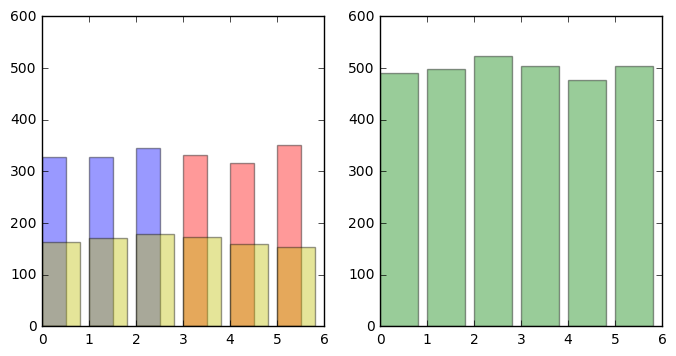

In [92]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)


normal = np.bincount(rating_normal)
bom = np.bincount(rating_tudo_bom)
ruim = np.bincount(rating_tudo_ruim)
all_rating = np.bincount(rating_all)

ax1.bar(range(len(ruim)), ruim, alpha=.4, width=.5)
ax1.bar(range(len(bom)), bom, color='r', alpha=.4, width=.5)
ax1.bar(range(len(normal)), normal, color='y', alpha=.4)
ax2.bar(range(len(all_rating)), all_rating, color='g', alpha=.4)

(array([  19.,  256.,  550.,  205.,  379.,  485.,  170.,  448.,  418.,   70.]),
 array([-7.48255667, -6.04326656, -4.60397646, -3.16468635, -1.72539625,
        -0.28610614,  1.15318396,  2.59247406,  4.03176417,  5.47105427,
         6.91034438]),
 <a list of 10 Patch objects>)

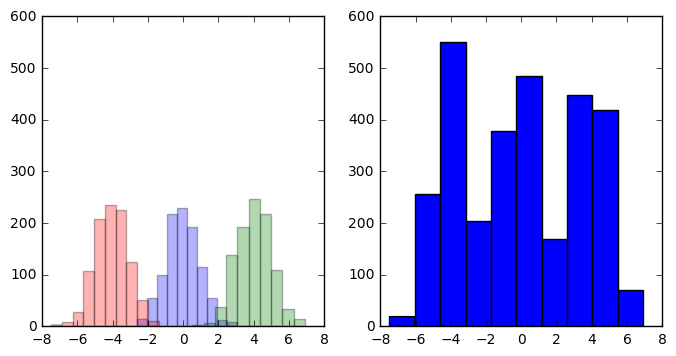

In [116]:
n1 = np.random.normal(.0, 1., 1000)
n2 = np.random.normal(4., 1., 1000)
n3 = np.random.normal(-4., 1., 1000)

al = np.r_[n1, n2, n3]

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)

ax1.hist(n1, alpha=.3)
ax1.hist(n2, alpha=.3)
ax1.hist(n3, alpha=.3)
ax2.hist(al)

(array([  2.00000000e+00,   3.00000000e+00,   1.20000000e+01,
          1.20000000e+01,   2.60000000e+01,   6.70000000e+01,
          8.90000000e+01,   1.00000000e+02,   1.92000000e+02,
          2.02900000e+03,   1.75000000e+02,   1.05000000e+02,
          7.00000000e+01,   4.80000000e+01,   2.90000000e+01,
          2.30000000e+01,   1.10000000e+01,   2.00000000e+00,
          3.00000000e+00,   2.00000000e+00]),
 array([-318.50710516, -285.00482998, -251.50255479, -218.0002796 ,
        -184.49800442, -150.99572923, -117.49345404,  -83.99117885,
         -50.48890367,  -16.98662848,   16.51564671,   50.01792189,
          83.52019708,  117.02247227,  150.52474746,  184.02702264,
         217.52929783,  251.03157302,  284.53384821,  318.03612339,
         351.53839858]),
 <a list of 20 Patch objects>)

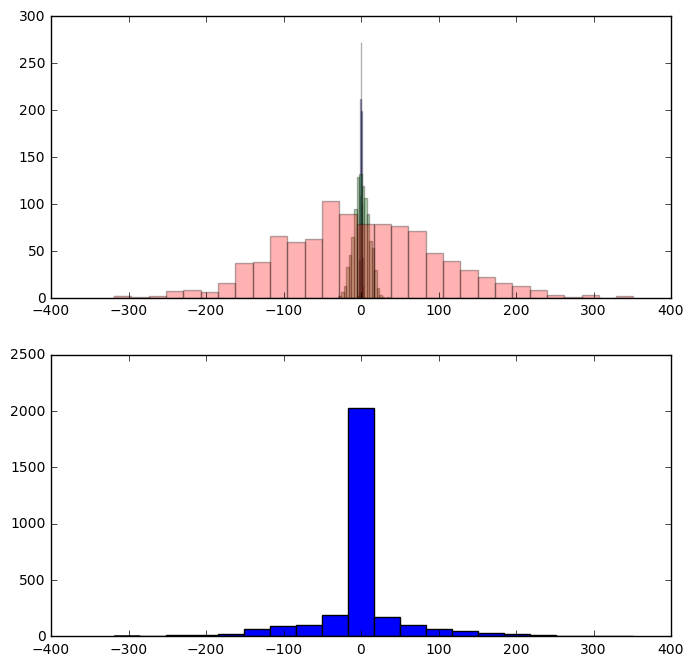

In [126]:
n1 = np.random.normal(.0, 1., 1000)
n2 = np.random.normal(.0, 10., 1000)
n3 = np.random.normal(.0, 100., 1000)

al = np.r_[n1, n2, n3]

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.hist(n1, alpha=.3)
ax1.hist(n2, alpha=.3, bins=20)
ax1.hist(n3, alpha=.3, bins=30)
ax2.hist(al, bins=20)

### Efeito de um elemento na média

In [135]:
x = np.random.normal(0, 1, 10)

mean = x.mean()
mean_ = np.r_[x, [100]].mean()

mean, mean_, mean_ - mean

(0.52467757864101627, 9.5678887078554702, 9.0432111292144537)

In [136]:
x = np.random.normal(0, 1, 100)

mean = x.mean()
mean_ = np.r_[x, [100]].mean()

mean, mean_, mean_ - mean

(-0.036081263945877538, 0.9543749861922004, 0.99045625013807792)

In [137]:
x = np.random.normal(0, 1, 1000)

mean = x.mean()
mean_ = np.r_[x, [100]].mean()

mean, mean_, mean_ - mean

(-0.0047152973980944101, 0.095189513088816777, 0.099904810486911189)

In [138]:
x = np.random.normal(0, 1, 10000)

mean = x.mean()
mean_ = np.r_[x, [100]].mean()

mean, mean_, mean_ - mean

(-0.0022782206381735427, 0.0077210072611003464, 0.0099992278992738892)

## Ratings

* explict x implicit
  * click x don't click
    * absence of click -> don't like x don't seen
  * purchased
    * liked x don't liked
* quando
  * durante a experiência
  * depois -> memória: há quanto tempo
  * antes da experiência -> expectation
* domínio
  * range: [0, 10], [1, 5]
  * review
  * vote: [+1], [-1;+1] -> comum com ephemeral items
* tempo de vida
  * now() - created

## Display

* average
* upvote proportion
* net upvotes
* % >= threshold
* full distribution

## Damped mean

In [144]:
qtd_ratings = 100
x = np.random.normal(2, 2, qtd_ratings)

min_size = 1000

mean = x.mean()
damped_mean = (x.sum() + (min_size - x.shape[0]) * 3) / min_size
mid_range = (x.max() - x.min()) / 2

mean, damped_mean, mid_range

(2.0119354492073587, 2.9011935449207358, 4.926912350701607)

# Week 3

In [161]:
from sklearn.metrics.pairwise import cosine_similarity

In [210]:
movies = pd.DataFrame({'nome':['titanic', 'colateral', 'labirinto do fauno', 'mágico de oz', 'el_piadão', 'humor negro'],
                       'drama':[10, 5, 8, 6, 2, 10],
                       'romance':[10, 3, 2, 1, 3, 3],
                       'violência':[2, 10, 7, 1, 1, 8],
                       'fantasia':[2, 1, 10, 10, 3, 1],
                       'comédia':[1, 1, 1, 2, 10, 10]})
movies.set_index('nome', inplace=True)
movies

,comédia,drama,fantasia,romance,violência
nome,,,,,
titanic,1,10,2,10,2
colateral,1,5,1,3,10
labirinto do fauno,1,8,10,2,7
mágico de oz,2,6,10,1,1
el_piadão,10,2,3,3,1
humor negro,10,10,1,3,8


In [211]:
profile = pd.DataFrame({'nome':['Abelardo', 'Dramis', 'Josino', 'Carlos', 'el_titanic'],
                        'drama':[4, 8, 1, 3, 10], 
                        'romance':[2, 5, 1, 3, 10], 
                        'violência':[8, 3, 6, 2, 2],
                        'fantasia':[10, 3, 8, 3, 2],
                        'comédia':[7, 8, 9, 10, 1]})
profile.set_index('nome', inplace=True)
profile

,comédia,drama,fantasia,romance,violência
nome,,,,,
Abelardo,7,4,10,2,8
Dramis,8,8,3,5,3
Josino,9,1,8,1,6
Carlos,10,3,3,3,2
el_titanic,1,10,2,10,2


sem normalização

Dramis gosta de humor OU drama, e não dos dois

cholocate e pimenta :)

que tal clusterizar os filmes do usuário(profiles do usuário) e recomendar baseado neles?

In [212]:
pd.DataFrame(cosine_similarity(movies, profile), index=movies.index, columns=profile.index).T

nome,titanic,colateral,labirinto do fauno,mágico de oz,el_piadão,humor negro
nome,,,,,,
Abelardo,0.466752,0.690968,0.882972,0.813654,0.720658,0.751970
Dramis,0.793451,0.629512,0.688851,0.654573,0.848115,0.933207
Josino,0.291458,0.538795,0.705936,0.688578,0.833167,0.710062
Carlos,0.483483,0.427041,0.497068,0.535233,0.992618,0.833962
el_titanic,1.000000,0.610934,0.632459,0.545645,0.424115,0.660250


normalizando usuário

notar como antes de normalizar, comédia tem um peso grande para Carlos! mas todo mundo gosta de comédia!!!

In [213]:
norm_profile = normalize(profile, axis=0)
norm_profile

array([[ 0.40755576,  0.2901905 ,  0.73323558,  0.16963779,  0.73960026],
       [ 0.46577801,  0.580381  ,  0.21997067,  0.42409446,  0.2773501 ],
       [ 0.52400026,  0.07254763,  0.58658846,  0.08481889,  0.5547002 ],
       [ 0.58222251,  0.21764288,  0.21997067,  0.25445668,  0.18490007],
       [ 0.05822225,  0.72547625,  0.14664712,  0.84818893,  0.18490007]])

In [214]:
pd.DataFrame(cosine_similarity(movies, norm_profile), index=movies.index, columns=profile.index).T

nome,titanic,colateral,labirinto do fauno,mágico de oz,el_piadão,humor negro
nome,,,,,,
Abelardo,0.470990,0.770756,0.903476,0.775941,0.625736,0.731306
Dramis,0.858686,0.706260,0.737953,0.662344,0.781041,0.923825
Josino,0.312706,0.643815,0.770503,0.691898,0.740193,0.701070
Carlos,0.578815,0.528534,0.586519,0.586928,0.970836,0.865103
el_titanic,0.996614,0.617495,0.611845,0.511967,0.410668,0.635035


In [244]:
def qual_meu_filme(profile, qtd=3):
    
    return pd.Series(cosine_similarity(movies, profile.reshape(1, -1)).ravel(), index=movies.index).nlargest(qtd)

norm_movies = normalize(movies, axis=1)
def qual_meu_filme_normed(profile, qtd=3):
    
    return pd.Series(cosine_similarity(norm_movies, profile.reshape(1, -1)).ravel(), index=movies.index).nlargest(qtd)

In [249]:
qual_meu_filme(pd.Series({'comédia':3, 'drama':1, 'romance':1, 'violência':3, 'fantasia':1}))

nome
humor negro    0.896446
el_piadão      0.806718
colateral      0.785905
dtype: float64

In [250]:
qual_meu_filme_normed(pd.Series({'comédia':3, 'drama':1, 'romance':1, 'violência':3, 'fantasia':1}))

nome
humor negro    0.896446
el_piadão      0.806718
colateral      0.785905
dtype: float64